In [1]:
import json
import mne
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

In [2]:
path = './data_S_1601325125_E_1601325162.json'

In [3]:
with open(path, 'r') as f:
    brain_data = json.load(f)

In [4]:
print(len(brain_data))
print(brain_data[0])

9275
{'timestamp': 1601325125402.0, 'sample': [-50603.1640625, -507367.84375, 386090.625, -58634.234375, -10322.8173828125, 184936.71875, 286646.5, -22653.939453125]}


In [5]:
class Data:
    def __init__(self, x, t):
        self.x = x
        self.t = t
        self.ELECTRODES = ['CP5', 'F5', 'C3', 'CP3', 'CP6', 'F6', 'C4', 'CP4']
        
    @property
    def volts(self):
        return [i * 10e-6 for i in self.x]
    
    @property
    def info(self):
        info = {'ts' : self.t}
        for n, x in zip(self.ELECTRODES, self.volts):
            info[n] = x
        return info
    

In [6]:
sample = Data(x = brain_data[0]['sample'], t = brain_data[0]['timestamp'])

In [7]:
sample.info

{'ts': 1601325125402.0,
 'CP5': -0.5060316406250001,
 'F5': -5.073678437500001,
 'C3': 3.86090625,
 'CP3': -0.58634234375,
 'CP6': -0.103228173828125,
 'F6': 1.8493671875000002,
 'C4': 2.8664650000000003,
 'CP4': -0.22653939453125002}

In [8]:
data = []
for bd in brain_data:
    sample = Data(x = bd['sample'], t = bd['timestamp'])
    data.append(sample.volts)

In [10]:
data = np.array(data).T
print(data.shape)

(8, 9275)


In [11]:
ch_names = ['CP5', 'F5', 'C3', 'CP3', 'CP6', 'F6', 'C4', 'CP4']
sfreq = 250

info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types='eeg')

In [12]:
raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=8, n_times=9275
    Range : 0 ... 9274 =      0.000 ...    37.096 secs
Ready.


In [13]:
print(raw)

<RawArray | 8 x 9275 (37.1 s), ~599 kB, data loaded>


In [14]:
raw.info

<Info | 7 non-empty values
 bads: []
 ch_names: CP5, F5, C3, CP3, CP6, F6, C4, CP4
 chs: 8 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 250.0 Hz
>

In [22]:
raw.filter(1., 40., fir_design='firwin')

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 825 samples (3.300 sec)



<RawArray | 8 x 9275 (37.1 s), ~599 kB, data loaded>

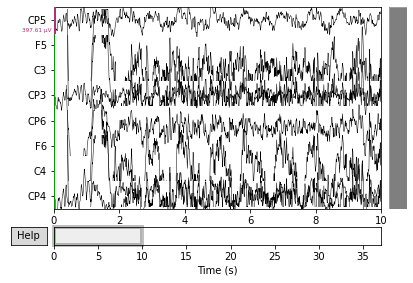

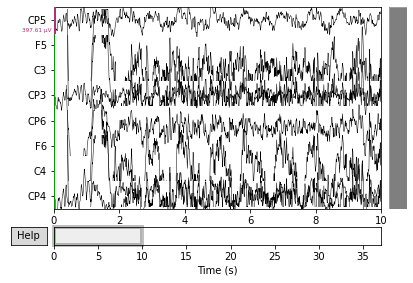

In [78]:
raw.plot(n_channels=8, scalings='auto', 
         title='Data from arrays',
         show=True, block=True, remove_dc=True)

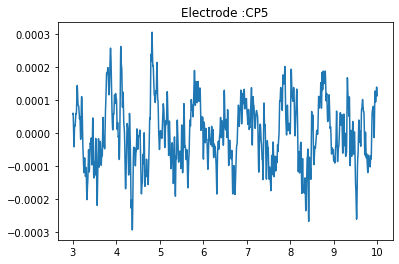

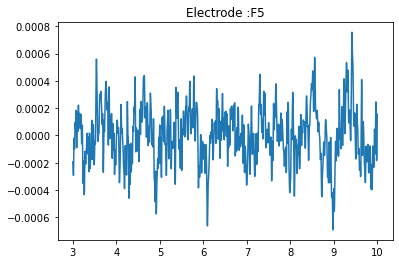

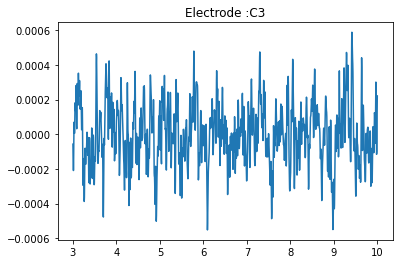

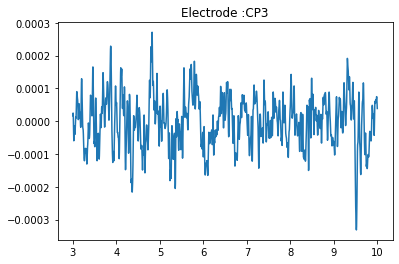

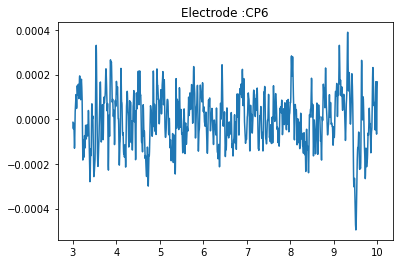

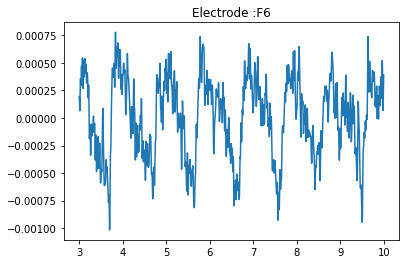

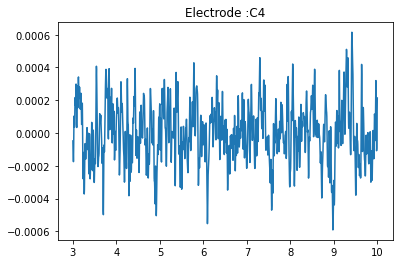

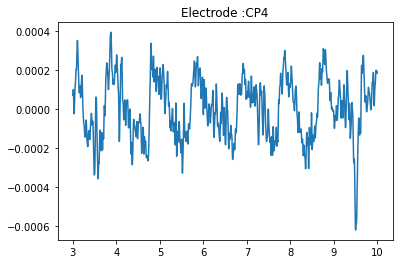

In [76]:
# Extract data from the first 5 channels, from 1 s to 3 s.
sfreq = raw.info['sfreq']
for i, n in enumerate(raw.info['ch_names']):
    data, times = raw[i, int(sfreq * 3):int(sfreq * 10)]
    plt.figure()
    plt.plot(times, data.T)
    plt.title('Electrode :' + n )
    plt.legend